In [1]:
from metrics import effect_size, wilcoxon_test
import numpy as np
from scipy.stats import expon, norm, kstest, boxcox
from functools import partial
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
inversion_numbers = np.array([[0.53, 0.45], [0.55, 0.47], [0.67, 0.51], [0, 0],
                    [0.48, 0.25], [0.54, 0.45], [0.66, 0.49], [0, 0.07],
                    [0.72, 0.65], [0.72, 0.43], [0.73, 0.41], [0, 0]])

In [3]:
effect_size(inversion_numbers)

0.5333333333333333

In [4]:
wilcoxon_test(inversion_numbers[:, 0], inversion_numbers[:, 1])

/home/local/USHERBROOKE/masj2413/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.009344113002204883

In [5]:
x = np.linspace(0.04,
                4, 10000)
x_min, x_max = np.min(x), np.max(x)

In [6]:
loc, scale = norm.fit(x)
loc, scale

(2.02, 1.1432678540650978)

In [7]:
kstest(x, partial(norm.cdf, loc=loc, scale=scale))

KstestResult(statistic=0.05725671950861361, pvalue=6.152601507635768e-29)

In [8]:
minmax = MinMaxScaler(feature_range=(x_min, x_max))

In [9]:
xt, _ = boxcox(x)
xt = minmax.fit_transform(xt.reshape(-1, 1)).reshape(1, -1)[0]
#xt, _ = boxcox(xt)

In [10]:
loc, scale = norm.fit(xt)
loc, scale

(2.30222749971847, 1.0823842478321901)

In [11]:
kstest(xt, partial(norm.cdf, loc=loc, scale=scale))

KstestResult(statistic=0.06471290180964295, pvalue=7.494357925789567e-37)

In [12]:
kstest(xt, norm.cdf)

KstestResult(statistic=0.6895270053099206, pvalue=0.0)

No handles with labels found to put in legend.


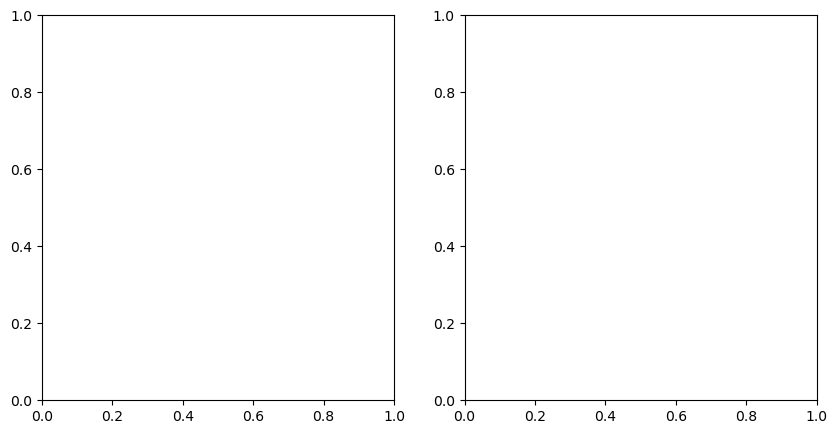

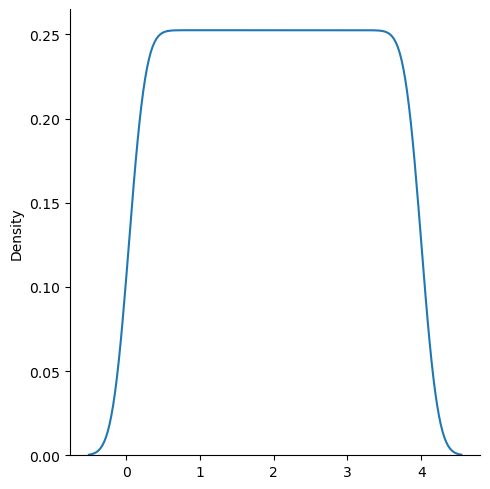

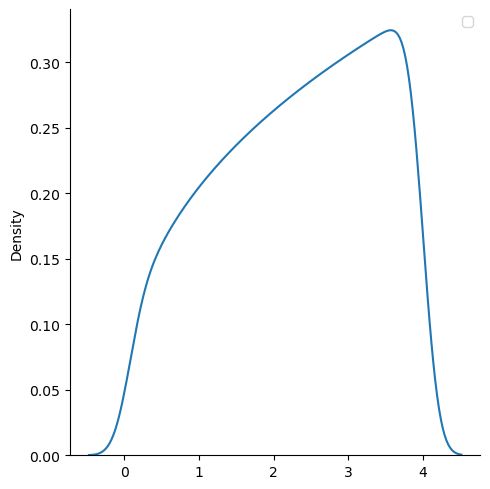

In [13]:
fig, ax = plt.subplots(1, 2)

sns.displot(x, kind = 'kde')
 
sns.displot(xt,  kind = 'kde')
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

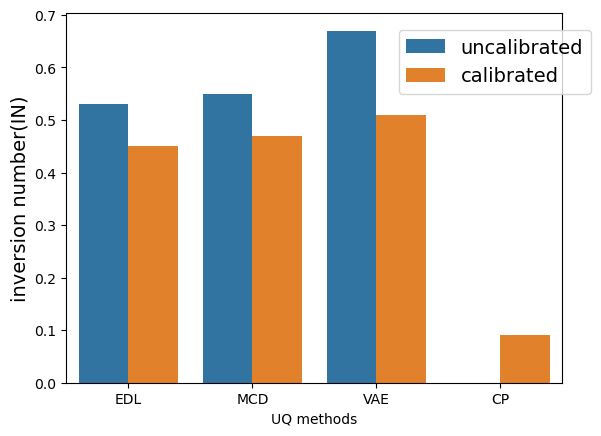

In [10]:
columns = ["inversion number(IN)", "UQ methods", "indicator"]
data = [[0.53, "EDL", "uncalibrated"],
       [0.45, "EDL", "calibrated"],
       [0.55, "MCD", "uncalibrated"],
       [0.47, "MCD", "calibrated"],
       [0.67, "VAE", "uncalibrated"],
       [0.51, "VAE", "calibrated"],
       [0, "CP", "uncalibrated"],
       [0.09, "CP", "calibrated"]]
df = pd.DataFrame(data, columns=columns)
fig = sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(.65,.98), fontsize=14)
fig.set_ylabel("inversion number(IN)", fontsize=14)
plt.savefig("in_kdd.png", dpi=300)

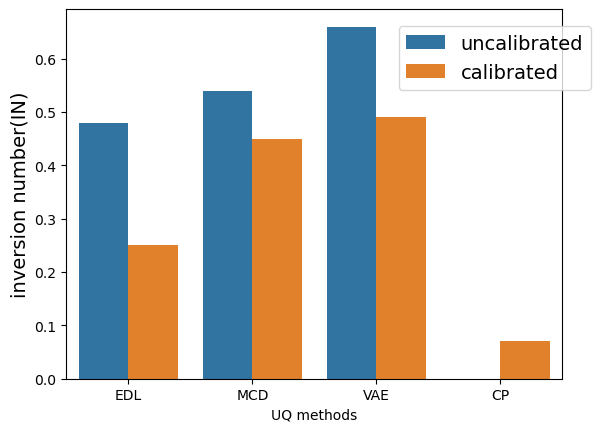

In [12]:
data = [[0.48, "EDL", "uncalibrated"],
       [0.25, "EDL", "calibrated"],
       [0.54, "MCD", "uncalibrated"],
       [0.45, "MCD", "calibrated"],
       [0.66, "VAE", "uncalibrated"],
       [0.49, "VAE", "calibrated"],
       [0, "CP", "uncalibrated"],
       [0.07, "CP", "calibrated"]]
df = pd.DataFrame(data, columns=columns)
fig = sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(.65,.98), fontsize=14)
fig.set_ylabel("inversion number(IN)", fontsize=14)
plt.savefig("in_nsl.png", dpi=300)

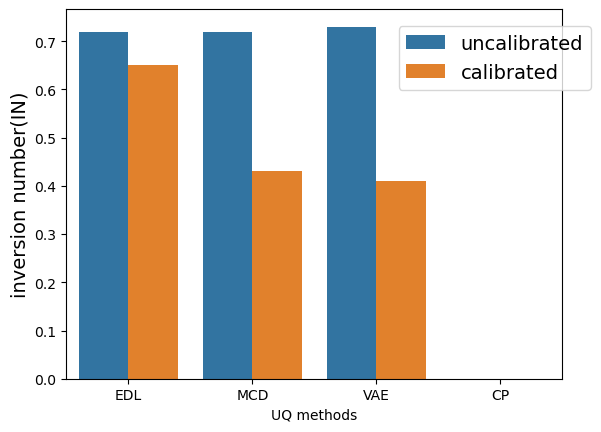

In [13]:
data = [[0.72, "EDL", "uncalibrated"],
       [0.65, "EDL", "calibrated"],
       [0.72, "MCD", "uncalibrated"],
       [0.43, "MCD", "calibrated"],
       [0.73, "VAE", "uncalibrated"],
       [0.41, "VAE", "calibrated"],
       [0, "CP", "uncalibrated"],
       [0, "CP", "calibrated"]]
df = pd.DataFrame(data, columns=columns)
fig = sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(.65,.98), fontsize=14)
fig.set_ylabel("inversion number(IN)", fontsize=14)
plt.savefig("in_ids.png", dpi=300)